# Support Vector Machine

### Task :
* To build a Support Vector Machine model using the mushrrom dataset provided.

## Task 1:  Exploratory Data Analysis (EDA) 

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read the data

In [3]:
df = pd.read_csv("./mushroom.csv")

In [4]:
df1 = df.copy()

In [5]:
df1.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


#### Data types and null values info

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

#### Descriptive statistics for numeric columns

In [7]:
df1.describe()

,Unnamed: 0,stalk_height,cap_diameter
count,2000.000000,2000.000000,2000.000000
mean,624.974000,8.449118,12.314345
std,375.091938,3.697217,7.048845
min,0.000000,2.000000,1.000000
25%,290.000000,5.291009,5.723521
50%,607.000000,8.318596,12.124902
75%,957.250000,11.781272,18.698605
max,1279.000000,15.095066,25.000054


#### categorical columns

In [8]:
df1.describe(include='object')

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class
count,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
unique,5,4,9,2,9,4,3,2,12,2,...,9,9,2,4,3,8,9,6,7,2
top,sunken,scaly,brown,yes,foul,free,distant,narrow,orange,enlarging,...,brown,orange,universal,white,one,sheathing,brown,abundant,urban,poisonous
freq,439,568,263,1023,274,540,677,1007,216,1040,...,271,259,1010,553,689,305,255,360,316,1400


#### Null counts

In [9]:
df1.isnull().sum()

Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

#### -> no null values detected.

### Check for duplicates

In [10]:
df1.duplicated().sum()

1024

In [11]:
df1[df1.duplicated(keep=False)]

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,618,flat,grooves,green,yes,musty,notched,crowded,broad,chocolate,...,universal,yellow,one,zone,brown,abundant,meadows,poisonous,14.834383,2.053744
1994,871,flat,scaly,pink,no,spicy,attached,distant,narrow,red,...,universal,brown,two,zone,brown,abundant,meadows,poisonous,4.794826,4.576464
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020


In [76]:
df1.duplicated().sum()
df1[df1.duplicated()]['class'].value_counts()

class
poisonous    782
edible       242
Name: count, dtype: int64

###  Dropping duplicates

In [12]:
df2 = df1.drop_duplicates()

In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 976 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                976 non-null    int64  
 1   cap_shape                 976 non-null    object 
 2   cap_surface               976 non-null    object 
 3   cap_color                 976 non-null    object 
 4   bruises                   976 non-null    object 
 5   odor                      976 non-null    object 
 6   gill_attachment           976 non-null    object 
 7   gill_spacing              976 non-null    object 
 8   gill_size                 976 non-null    object 
 9   gill_color                976 non-null    object 
 10  stalk_shape               976 non-null    object 
 11  stalk_root                976 non-null    object 
 12  stalk_surface_above_ring  976 non-null    object 
 13  stalk_surface_below_ring  976 non-null    object 
 14  stalk_color_ab

In [14]:
df2 = df2.reset_index(drop=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                976 non-null    int64  
 1   cap_shape                 976 non-null    object 
 2   cap_surface               976 non-null    object 
 3   cap_color                 976 non-null    object 
 4   bruises                   976 non-null    object 
 5   odor                      976 non-null    object 
 6   gill_attachment           976 non-null    object 
 7   gill_spacing              976 non-null    object 
 8   gill_size                 976 non-null    object 
 9   gill_color                976 non-null    object 
 10  stalk_shape               976 non-null    object 
 11  stalk_root                976 non-null    object 
 12  stalk_surface_above_ring  976 non-null    object 
 13  stalk_surface_below_ring  976 non-null    object 
 14  stalk_colo

In [15]:
cols = df2.columns
for col in cols:
    print(f"Column {col}: {df2[col].nunique()}")

Column Unnamed: 0: 976
Column cap_shape: 5
Column cap_surface: 4
Column cap_color: 9
Column bruises: 2
Column odor: 9
Column gill_attachment: 4
Column gill_spacing: 3
Column gill_size: 2
Column gill_color: 12
Column stalk_shape: 2
Column stalk_root: 7
Column stalk_surface_above_ring: 4
Column stalk_surface_below_ring: 4
Column stalk_color_above_ring: 9
Column stalk_color_below_ring: 9
Column veil_type: 2
Column veil_color: 4
Column ring_number: 3
Column ring_type: 8
Column spore_print_color: 9
Column population: 6
Column habitat: 7
Column class: 2
Column stalk_height: 973
Column cap_diameter: 976


In [16]:
df2.head(2)

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319


### Automating EDA process

In [17]:
import ydata_profiling as pp

In [18]:
report = pp.ProfileReport(df2)

In [19]:
report.to_file(output_file='eda_report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


%|                                                                                           | 0/26 [00:00<?, ?it/s]
%|█████████▌                                                                         | 3/26 [00:00<00:00, 28.97it/s]
100%|██████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 62.43it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#### The report shows the features Unnamed: 0 and cap_diameter are unique. Feature Unnamed: 0 is just an index and isnt helpful in classication model, better to drop

In [20]:
df2.drop(columns=['Unnamed: 0'], inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   cap_shape                 976 non-null    object 
 1   cap_surface               976 non-null    object 
 2   cap_color                 976 non-null    object 
 3   bruises                   976 non-null    object 
 4   odor                      976 non-null    object 
 5   gill_attachment           976 non-null    object 
 6   gill_spacing              976 non-null    object 
 7   gill_size                 976 non-null    object 
 8   gill_color                976 non-null    object 
 9   stalk_shape               976 non-null    object 
 10  stalk_root                976 non-null    object 
 11  stalk_surface_above_ring  976 non-null    object 
 12  stalk_surface_below_ring  976 non-null    object 
 13  stalk_color_above_ring    976 non-null    object 
 14  stalk_colo

In [21]:
num_col =  ['stalk_height', 'cap_diameter']

In [22]:
for col in num_col:
    skew_value = df[col].skew()
    print(f"Skewness of {col}: {skew_value}")

Skewness of stalk_height: 0.0383116032695003
Skewness of cap_diameter: 0.10759489701255188


#### Since the skewness is negligible, no transformation is necessary for these variables

## Task 2: Visualization
### For numerical columns

### Univariate Analysis -  Histogram plot

In [23]:
%matplotlib inline

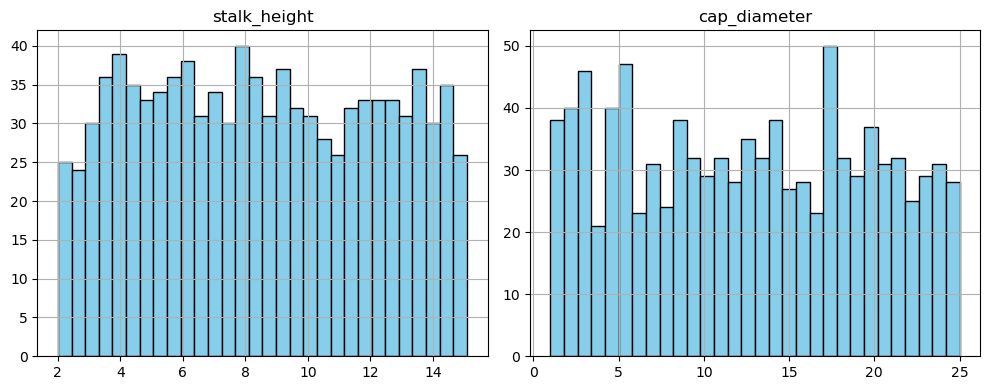

In [24]:
df2.hist(bins=30, figsize=(10, 4), color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()

### Interpretation:
The histograms for stalk_height and cap_diameter show that both features have a fairly uniform distribution with some minor fluctuations. Stalk_height values are evenly spread between 2 and 15 units, while cap_diameter shows a few peaks around 5 and 18 units. No major skewness or outliers are visually apparent. Since both features vary within different ranges, applying feature scaling before training the SVM model is essential to ensure balanced influence on the decision boundary.

### Density plots

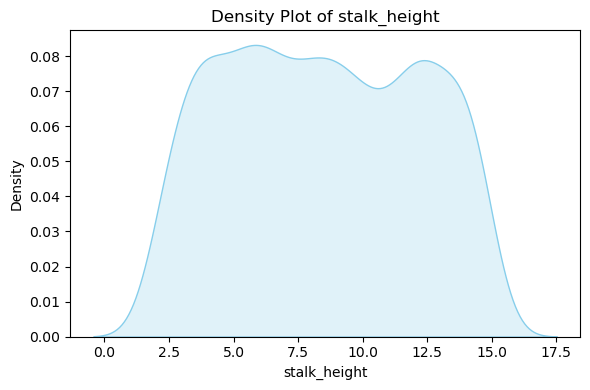

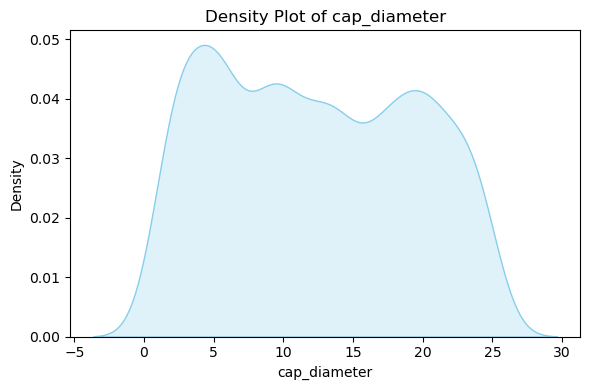

In [25]:
for col in num_col:
    plt.figure(figsize=(6, 4))
    sns.kdeplot(data=df, x=col, fill=True, color='skyblue')
    plt.title(f'Density Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.tight_layout()
    plt.show()

### Interpretation:
Both stalk_height and cap_diameter variables exhibit approximately uniform or evenly spread distributions, which means their values are distributed fairly equally over their respective ranges without strong clustering, skewness, or outliers. This kind of distribution is favorable for many modeling techniques as it avoids bias towards any specific value range.

### Scatter Plot: Stalk Height vs Cap Diameter

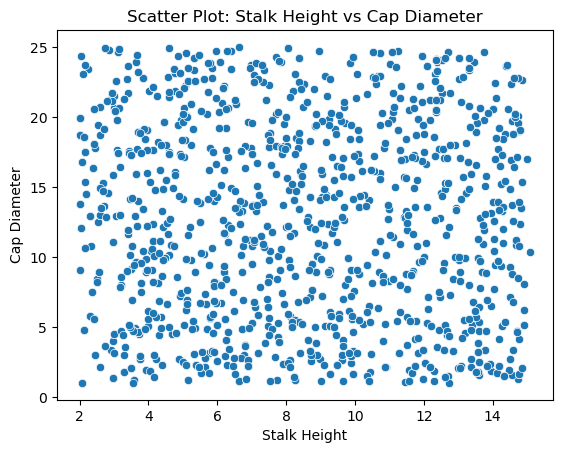

In [118]:
# Scatter plot between two continuous variables
sns.scatterplot(x='stalk_height', y='cap_diameter', data=df)
plt.title('Scatter Plot: Stalk Height vs Cap Diameter')
plt.xlabel('Stalk Height')
plt.ylabel('Cap Diameter')
plt.show()

#### Interpretation

The scatter plot shows a clear positive correlation between stalk height and cap diameter. As the stalk height increases, the cap diameter tends to increase as well.

There are a few outliers where the stalk height is relatively high compared to the cap diameter, indicating some variability in the relationship.

The visualizations suggest that stalk height and cap diameter may be important features for distinguishing between the two classes ('poisonous' and 'edible').

### Boxplot for outlier detection 

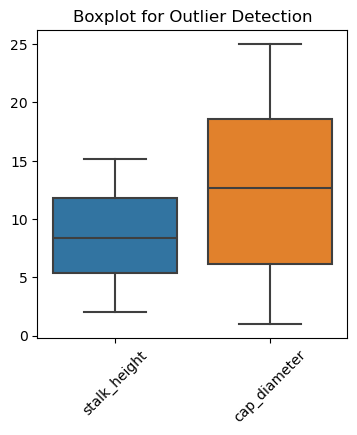

In [26]:
plt.figure(figsize=(4,4))
sns.boxplot(data=df2)
plt.xticks(rotation=45)
plt.title("Boxplot for Outlier Detection")
plt.show()

#### -> The two features doesnt seem to have any outliers, but its safe to check again.

In [27]:
from scipy.stats import iqr

### Function to detect and remove outliers

In [28]:
def remove_outliers_iqr(data2, cols, factor=1.5):
    mask = pd.Series(True, index=data2.index)
    for col in cols:
        Q1 = data2[col].quantile(0.25)
        Q3 = data2[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - factor * IQR
        upper = Q3 + factor * IQR
        mask &= data2[col].between(lower, upper)
    return data2[mask]

In [29]:
data_cleaned = remove_outliers_iqr(df2, num_col)

In [30]:
print(f"Rows before outlier removal: {df2.shape[0]}, after: {data_cleaned.shape[0]}")

Rows before outlier removal: 976, after: 976


#### -> No outliers present for sure.

### Correlation Analysis

In [31]:
corr_matrix = df2.corr(numeric_only = True)
corr_matrix

,stalk_height,cap_diameter
stalk_height,1.000000,-0.034891
cap_diameter,-0.034891,1.000000


### correlation matrix heatmap

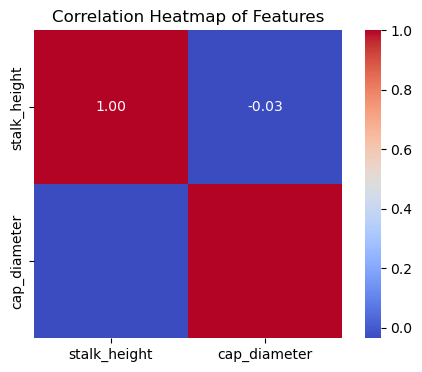

In [32]:
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Heatmap of Features")
plt.show()

#### NOTE:
->There’s a very weak negative correlation between stalk_height and cap_diameter, close to zero. Since the correlation is negligible, no multicollinearity concern exists between these two numerical variables.











### Visualising categorical columns:

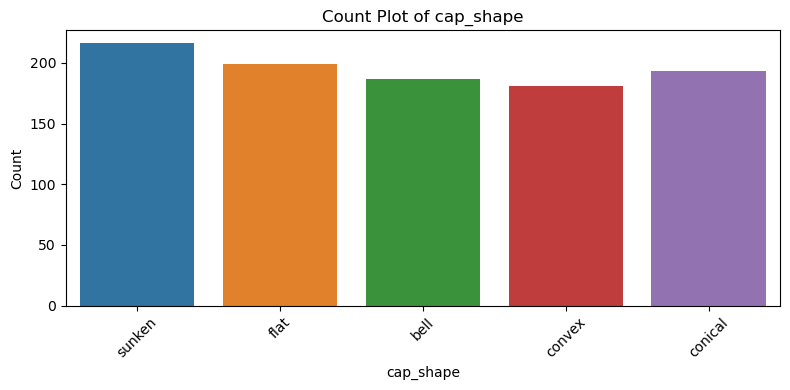

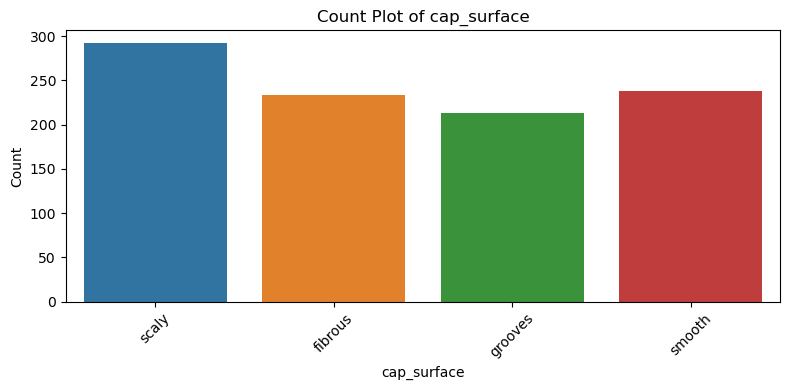

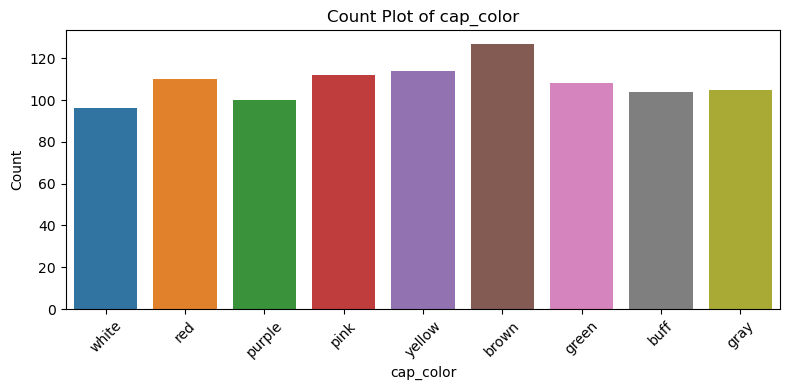

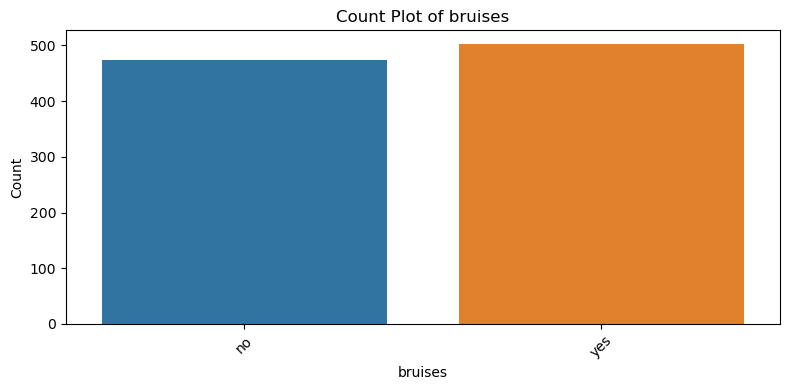

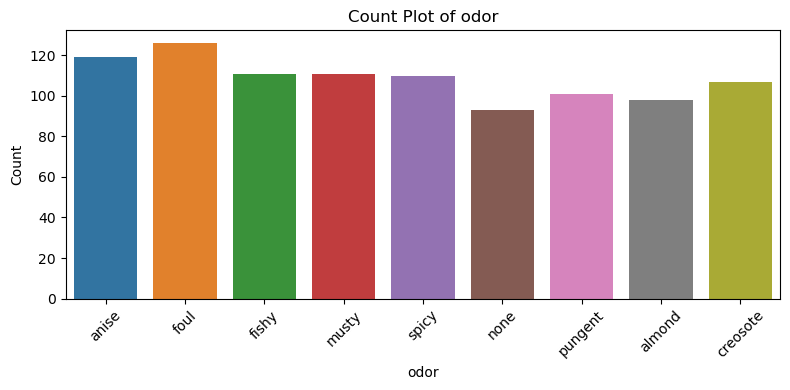

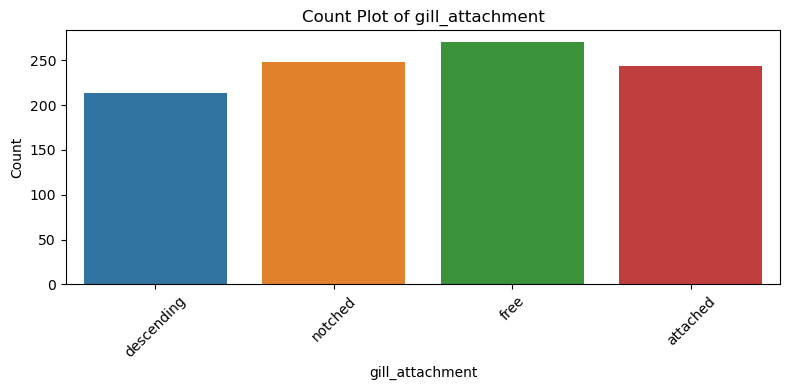

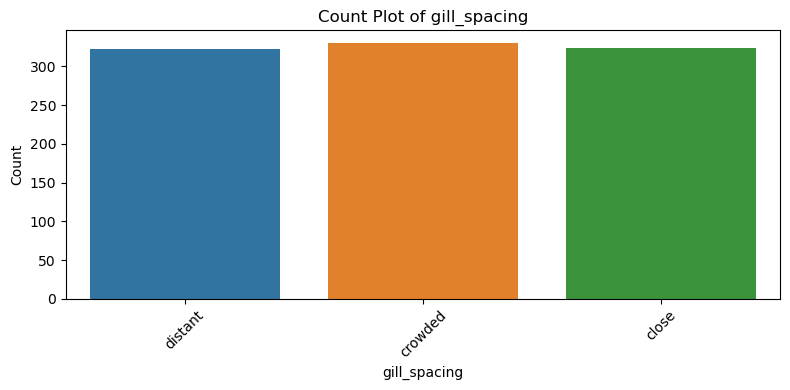

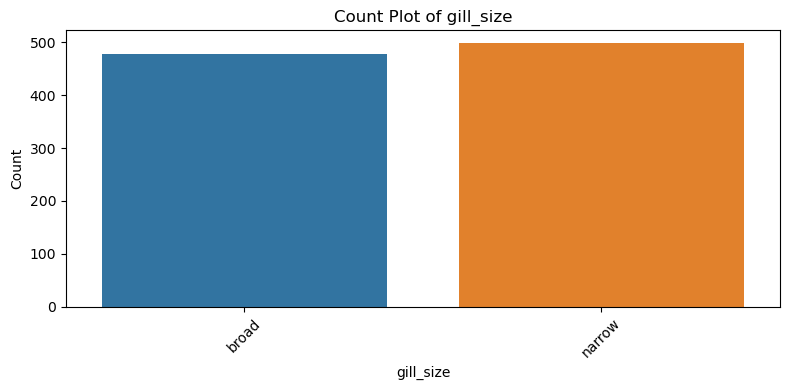

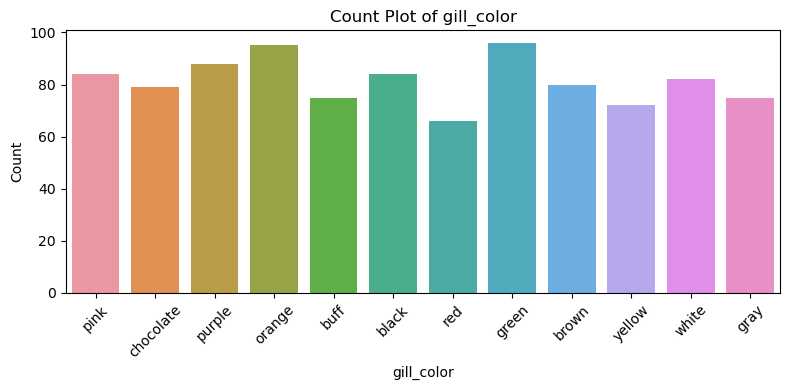

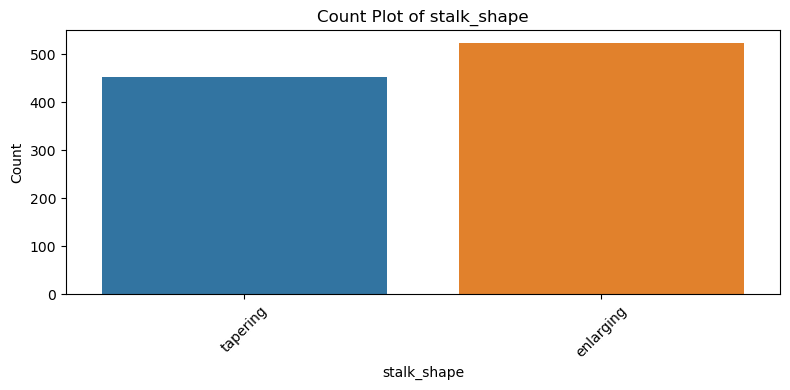

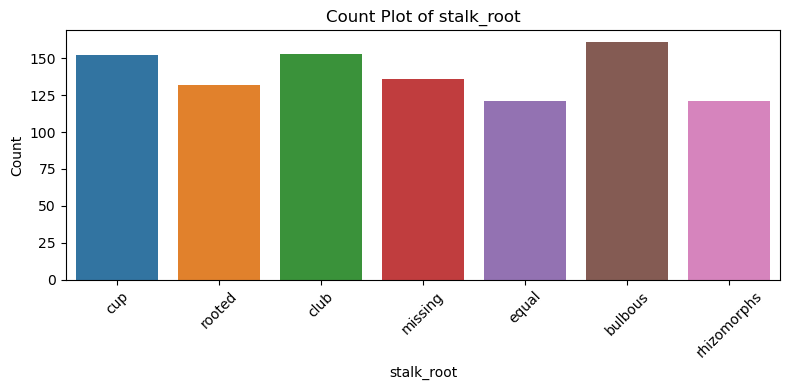

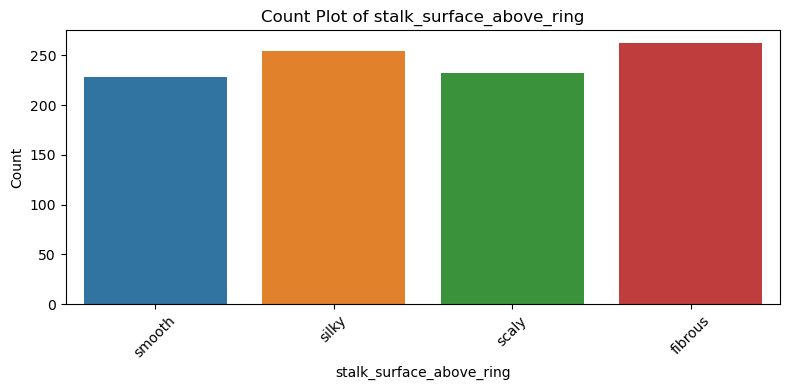

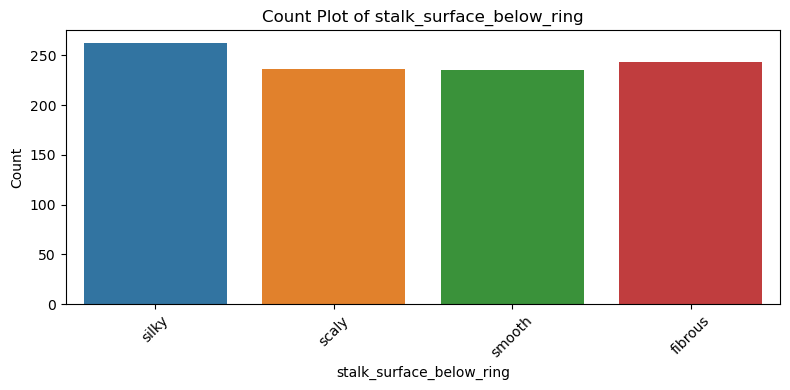

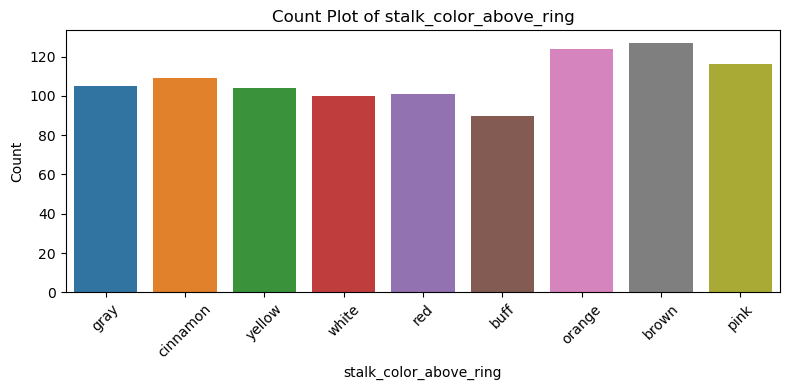

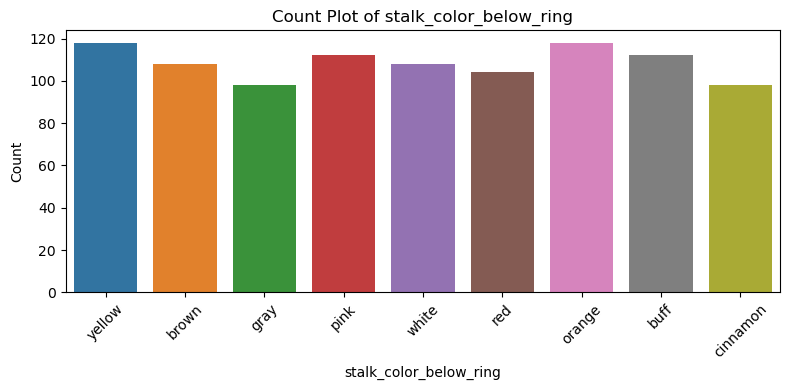

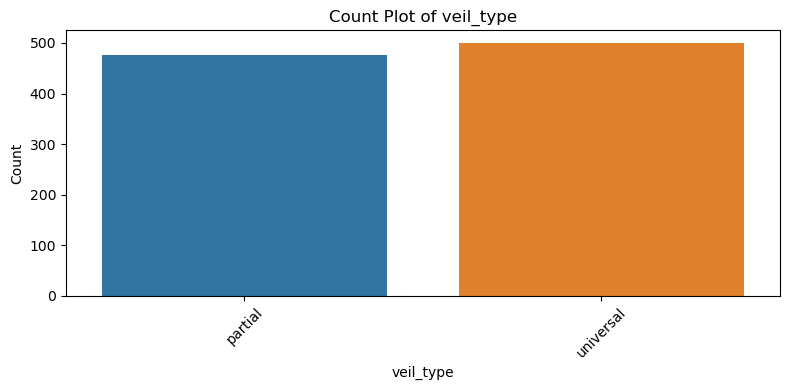

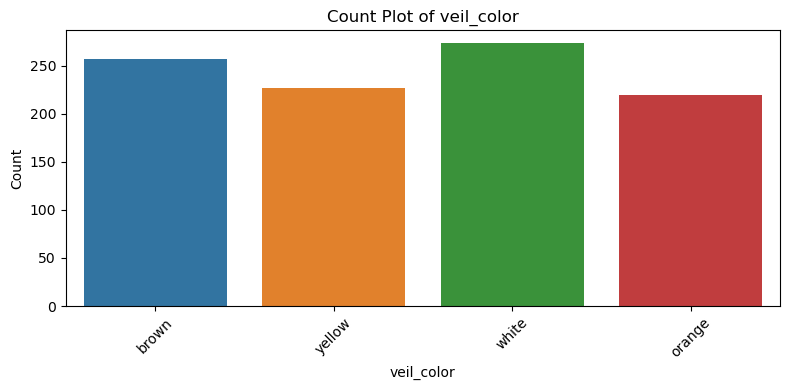

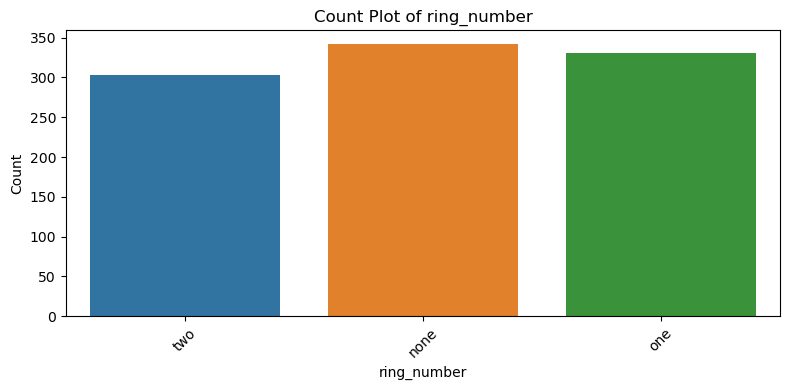

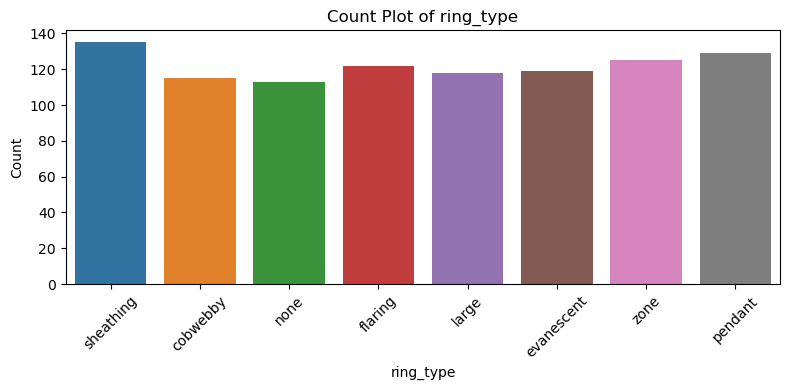

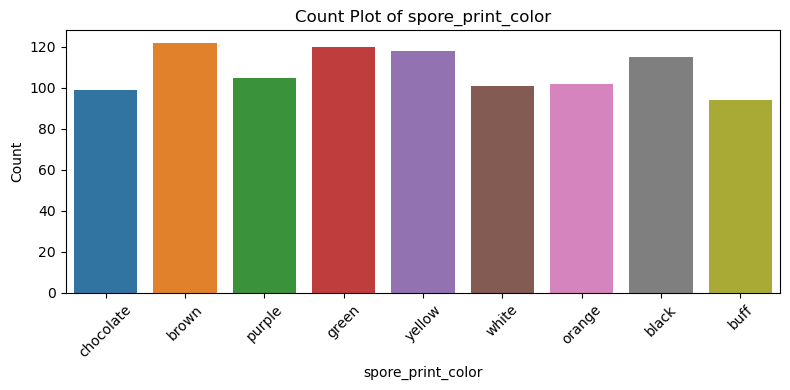

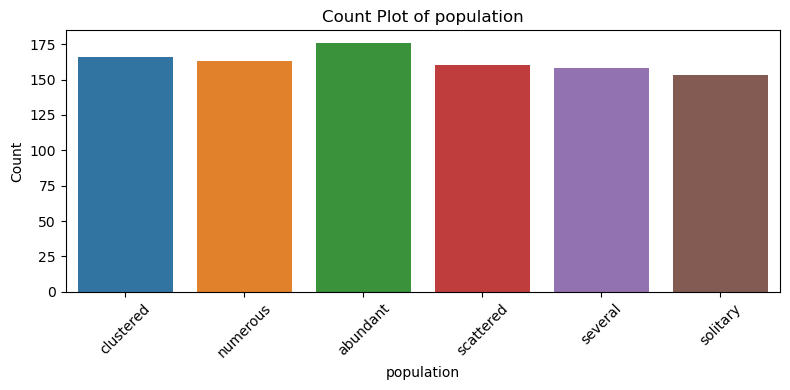

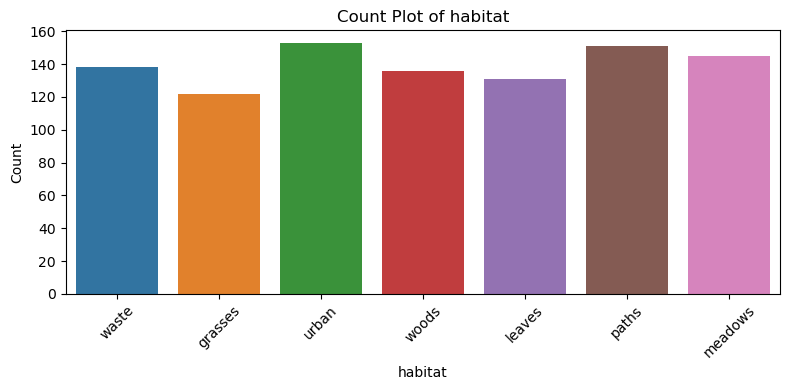

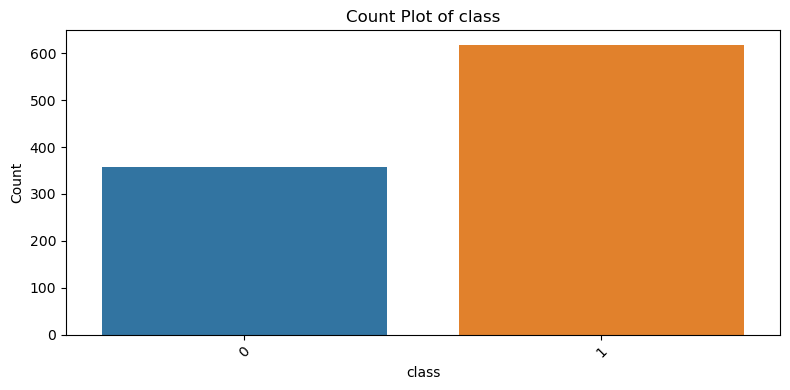

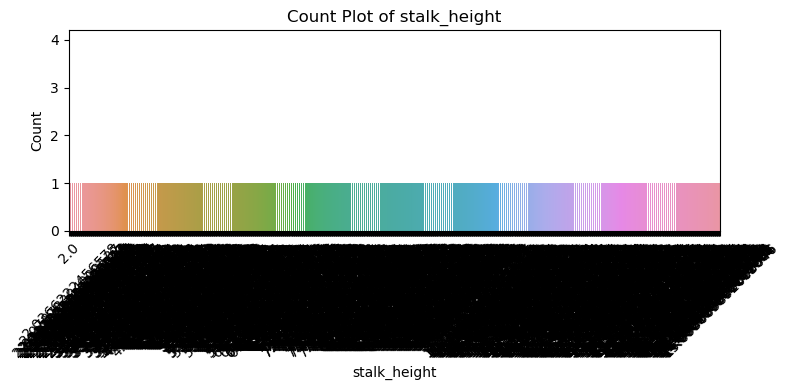

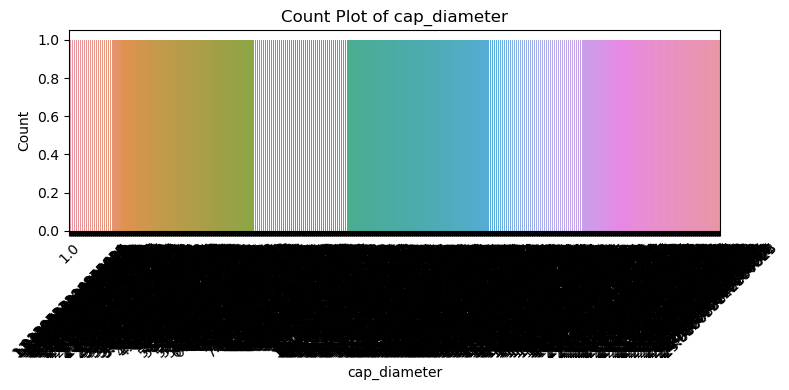

In [119]:
for col in df2.columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=df2)
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

#### Visualizing class distributions to gauge dataset balance or imbalance

In [33]:
# Check the value counts
print(df2['class'].value_counts())

class
poisonous    618
edible       358
Name: count, dtype: int64


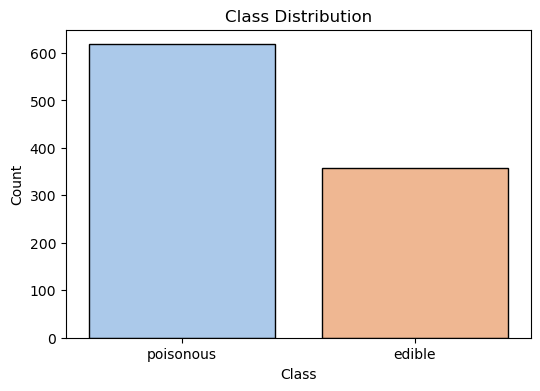

In [34]:
# Class distribution plot
plt.figure(figsize=(6, 4))
sns.countplot(x='class', data=df2, palette='pastel', edgecolor='black')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

#### Class Distribution Analysis
The dataset consists of 618 poisonous and 358 edible mushroom samples. The bar plot clearly shows a moderate class imbalance, with the poisonous class having significantly more instances than the edible class.

#### Implication for SVM:
Since SVM models can be sensitive to class imbalance, this could potentially bias the model toward predicting the majority class (poisonous). To address this, techniques like adjusting class weights (using class_weight='balanced' in scikit-learn’s SVM) or applying resampling methods (like oversampling the minority class or undersampling the majority class) can be considered to improve model performance and fairness.



## Task 3:  Data Preprocessing

### Encoding categorical variables - With onehot encoder
Using One-Hot Encoding , since most features are nominal — no natural order

In [35]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   cap_shape                 976 non-null    object 
 1   cap_surface               976 non-null    object 
 2   cap_color                 976 non-null    object 
 3   bruises                   976 non-null    object 
 4   odor                      976 non-null    object 
 5   gill_attachment           976 non-null    object 
 6   gill_spacing              976 non-null    object 
 7   gill_size                 976 non-null    object 
 8   gill_color                976 non-null    object 
 9   stalk_shape               976 non-null    object 
 10  stalk_root                976 non-null    object 
 11  stalk_surface_above_ring  976 non-null    object 
 12  stalk_surface_below_ring  976 non-null    object 
 13  stalk_color_above_ring    976 non-null    object 
 14  stalk_colo

In [36]:
df_encoded = pd.get_dummies(df2, drop_first=True)
df_encoded.head()

,stalk_height,cap_diameter,cap_shape_conical,cap_shape_convex,cap_shape_flat,cap_shape_sunken,cap_surface_grooves,cap_surface_scaly,cap_surface_smooth,cap_color_buff,...,population_scattered,population_several,population_solitary,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods,class_poisonous
0,14.276173,5.054983,False,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,True,False,True
1,3.952715,19.068319,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,9.054265,7.205884,False,False,True,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,True
3,5.226499,20.932692,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
4,14.037532,12.545245,False,False,True,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True


### Label Encoder for target variable 'class'

In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
le = LabelEncoder()

In [39]:
df2['class'] = le.fit_transform(df2['class'])

In [40]:
df2['class'].unique()

array([1, 0])

In [41]:
X = df_encoded.drop('class_poisonous', axis=1)

In [42]:
y = df2['class']

### Scale the data
Scaling the numerical columns

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
num_cols = ['stalk_height', 'cap_diameter'] 

In [45]:
scaler = StandardScaler()

In [46]:
df_scaled = df_encoded.copy()

In [47]:
X[num_cols] = scaler.fit_transform(X[num_cols])

In [48]:
X.head()

,stalk_height,cap_diameter,cap_shape_conical,cap_shape_convex,cap_shape_flat,cap_shape_sunken,cap_surface_grooves,cap_surface_scaly,cap_surface_smooth,cap_color_buff,...,population_numerous,population_scattered,population_several,population_solitary,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods
0,1.553976,-1.080201,False,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
1,-1.235285,0.926435,False,False,False,True,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
2,0.143086,-0.772204,False,False,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,-0.891126,1.193403,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1.489498,-0.007635,False,False,True,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False


### Train-test split 

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [51]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((780, 104), (196, 104), (780,), (196,))

## Task 4: SVM Implementation 
## Model-1 with Kernel = linear

In [52]:
from sklearn.svm import SVC

In [53]:
model = SVC(kernel='linear', class_weight='balanced')

In [54]:
model.fit(X_train,y_train)

SVC(class_weight='balanced', kernel='linear')

In [55]:
yhat_train = model.predict(X_train)

In [56]:
#yhat_train

### Model Evaluation

### Training metrics

In [57]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score

In [58]:
cm = confusion_matrix(y_train,yhat_train)
cm

array([[207,  79],
       [202, 292]], dtype=int64)

In [59]:
print("Training classification_report: ")
print(classification_report(y_train,yhat_train))

Training classification_report: 
              precision    recall  f1-score   support

           0       0.51      0.72      0.60       286
           1       0.79      0.59      0.68       494

    accuracy                           0.64       780
   macro avg       0.65      0.66      0.64       780
weighted avg       0.68      0.64      0.65       780



### Model performance with training data

On Training Data
Accuracy: 64%

Precision for class 0 (edible): 0.51
→ Out of all predictions labeled as class 0, 51% were actually correct.

Recall for class 0: 0.72
→ Out of all actual class 0 samples, 72% were correctly identified.

Precision for class 1 (poisonous): 0.79
→ Out of all predictions labeled as class 1, 79% were correct.

Recall for class 1: 0.59
→ Out of all actual class 1 samples, 59% were correctly identified.

F1-scores show a balanced trade-off, slightly better for class 1 (0.68) than class 0 (0.60).

Macro average F1-score is 0.64, suggesting moderate overall balance between the two classes on training data.

### Testing metrics

In [60]:
yhat_test = model.predict(X_test)

In [61]:
cm = confusion_matrix(y_test,yhat_test)
cm

array([[34, 38],
       [65, 59]], dtype=int64)

In [63]:
print("Testing classification_report: ")
print(classification_report(y_test,yhat_test))

Testing classification_report: 
              precision    recall  f1-score   support

           0       0.34      0.47      0.40        72
           1       0.61      0.48      0.53       124

    accuracy                           0.47       196
   macro avg       0.48      0.47      0.47       196
weighted avg       0.51      0.47      0.48       196



## Task 5: Visualization of SVM Results

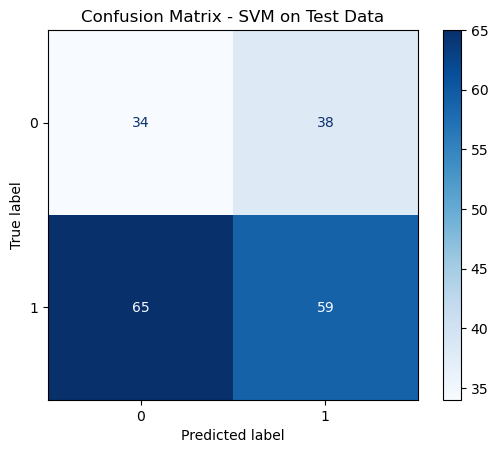

In [62]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - SVM on Test Data')
plt.show()

### Model performance with testing data
Accuracy: 47%
→ Model is not generalizing well on unseen data.

Precision for class 0 (edible): 0.34
→ Very low — lots of false positives when predicting edible.

Recall for class 0: 0.47
→ Only 47% of actual edible mushrooms were correctly identified.

Precision for class 1 (poisonous): 0.61
→ Better, but recall is only 0.48.

F1-scores are low for both classes (0.40 for class 0 and 0.53 for class 1).

Macro average F1-score is 0.47, indicating poor balance and weak overall performance on testing data.

### Summary:
The model performs moderately on training data but poorly on testing data, indicating overfitting.

The class imbalance may still be affecting the classifier, especially in correctly identifying the minority class (edible mushrooms).

Precision and recall are uneven — the model is better at identifying poisonous mushrooms (class 1) than edible ones (class 0).

### Visualizing classification results using numerical columns

In [95]:
### Choose two numerical or encoded features
X_train_2d = X_train_res[['cap_diameter', 'stalk_height']]
X_test_2d = X_test[['cap_diameter', 'stalk_height']]

# Train a new SVM on these two features
svm_2d = SVC(kernel='poly', C=1, gamma=1, degree=4)
svm_2d.fit(X_train_2d, y_train_res)


SVC(C=1, degree=4, gamma=1, kernel='poly')

In [114]:
from matplotlib.colors import ListedColormap

In [115]:
# meshgrid
x_min, x_max = X_train_2d.iloc[:, 0].min() - 1, X_train_2d.iloc[:, 0].max() + 1
y_min, y_max = X_train_2d.iloc[:, 1].min() - 1, X_train_2d.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

In [116]:
Z = svm_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

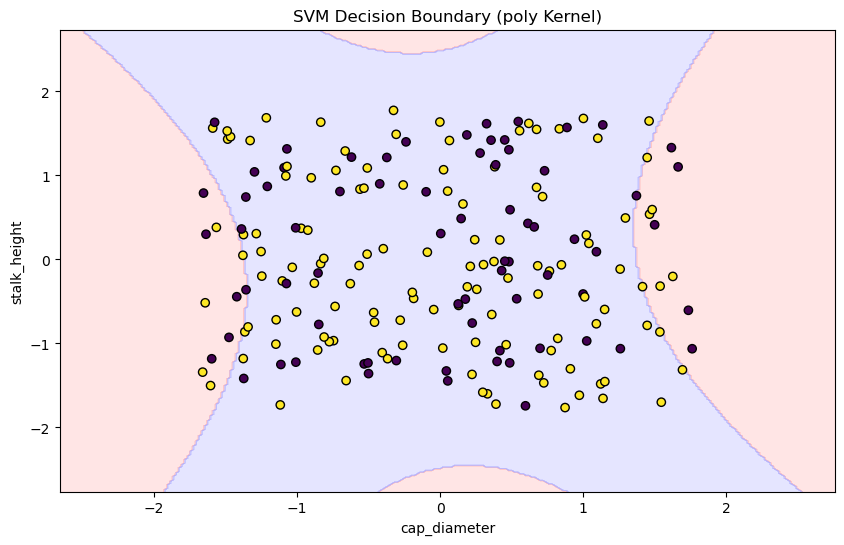

In [117]:
plt.figure(figsize=(10,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']))
plt.scatter(X_test_2d.iloc[:, 0], X_test_2d.iloc[:, 1], c=y_test, edgecolors='k')
plt.xlabel('cap_diameter')
plt.ylabel('stalk_height')
plt.title('SVM Decision Boundary (poly Kernel)')
plt.show()

### Interpretation:
The plot above visualizes the decision boundary formed by the SVM classifier with an poly kernel, using cap_diameter and stalk_height as the two features. The background color represents the predicted class regions: one region for edible mushrooms and the other for poisonous mushrooms. The scatter points indicate actual test data points, with different colors representing their true classes.

As seen, the SVM attempts to separate the classes with a nonlinear boundary. However, there is noticeable overlap between the two classes, reflecting the model's difficulty in cleanly separating edible and poisonous mushrooms based on these two features alone. This highlights a limitation of SVM in this case, suggesting either more discriminative features or a different model might be necessary for improved performance.



## Task 6: Parameter Tuning and Optimization
## Hyperparameter Tuning with GridSearchCV

In [64]:
from sklearn.model_selection import GridSearchCV

In [97]:
# parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3, 4],  # Only used if kernel='poly'
    'class_weight': ['balanced']
}

In [98]:
grid= GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [99]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'class_weight': ['balanced'], 'degree': [2, 3, 4],
                         'gamma': [0.001, 0.01, 0.1, 1, 10],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [100]:
print("Best Parameters:", grid.best_params_)
print("Best CV Score:", grid.best_score_)

Best Parameters: {'C': 1, 'class_weight': 'balanced', 'degree': 2, 'gamma': 1, 'kernel': 'rbf'}
Best CV Score: 0.6333333333333333


### Interpretation:
The RBF kernel with moderate regularization (C = 1) and higher gamma (gamma = 1) performed better than other combinations. This indicates that a non-linear decision boundary was more suitable for separating the classes in the given dataset.

## Model 2 with Kernel = rbf

In [66]:
model2 = SVC(kernel='rbf', C=1, gamma=1, class_weight='balanced')
model2.fit(X_train, y_train)

SVC(C=1, class_weight='balanced', gamma=1)

In [67]:
y_pred = model2.predict(X_test)

In [68]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        72
           1       0.63      1.00      0.78       124

    accuracy                           0.63       196
   macro avg       0.32      0.50      0.39       196
weighted avg       0.40      0.63      0.49       196



In [69]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[  0,  72],
       [  0, 124]], dtype=int64)

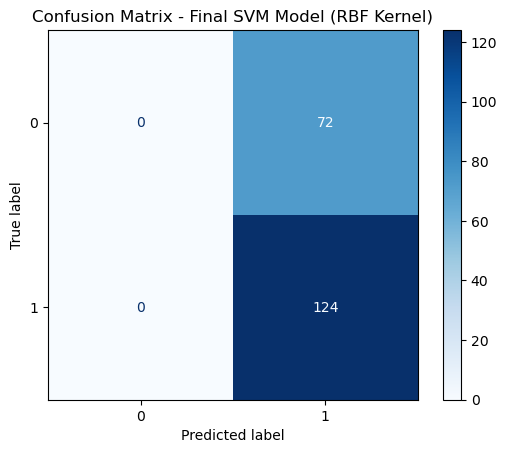

In [70]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model2.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - Final SVM Model (RBF Kernel)')
plt.show()

### Interpretation
The final model is highly biased toward classifying mushrooms as poisonous. While this results in a perfect recall (1.00) for the poisonous class, it entirely fails to identify edible mushrooms, with a recall of 0.00.

Possible Reasons:

Persistent class imbalance in the dataset.

The high gamma value (1) may have caused the decision boundary to tightly fit poisonous samples, at the cost of edible predictions.

## Model 3 - with Kernel = poly

In [71]:
model3 = SVC(kernel='poly', C=1, gamma=1, class_weight='balanced')
model3.fit(X_train, y_train)

SVC(C=1, class_weight='balanced', gamma=1, kernel='poly')

In [72]:
y_pred = model3.predict(X_test)

In [73]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.22      0.30        72
           1       0.65      0.85      0.74       124

    accuracy                           0.62       196
   macro avg       0.55      0.53      0.52       196
weighted avg       0.58      0.62      0.58       196



In [74]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 16,  56],
       [ 19, 105]], dtype=int64)

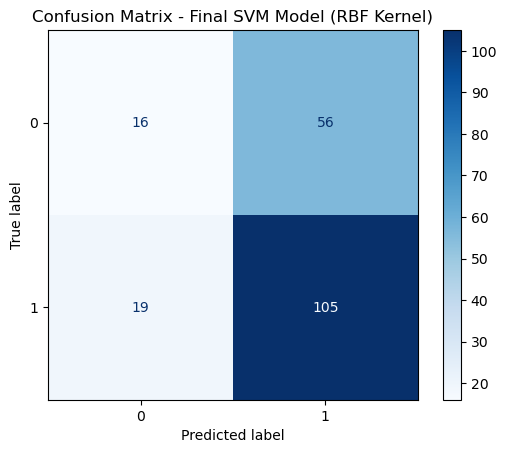

In [75]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model3.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - Final SVM Model (RBF Kernel)')
plt.show()

## Applying SMOTE technique
### -> to handle class imbalance

In [77]:
!pip install imbalanced-learn

In [102]:
from imblearn.over_sampling import SMOTE

In [103]:
# Splitting before applying SMOTE to avoid data leakage
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [104]:
# Applying SMOTE only to the training data
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [106]:
# Class distribution before SMOTE
print(y.value_counts())

class
1    618
0    358
Name: count, dtype: int64


In [107]:
# New class distribution after SMOTE
print(y_train_res.value_counts())

class
0    494
1    494
Name: count, dtype: int64


### Building the model 

In [108]:
svm_model = SVC(kernel='poly', C=1, gamma=1, degree=4)

In [109]:
svm_model.fit(X_train_res, y_train_res)

SVC(C=1, degree=4, gamma=1, kernel='poly')

In [110]:
y_pred = svm_model.predict(X_test)

In [111]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.04      0.08        72
           1       0.64      0.98      0.77       124

    accuracy                           0.64       196
   macro avg       0.62      0.51      0.43       196
weighted avg       0.62      0.64      0.52       196



In [112]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[  3,  69],
       [  2, 122]], dtype=int64)

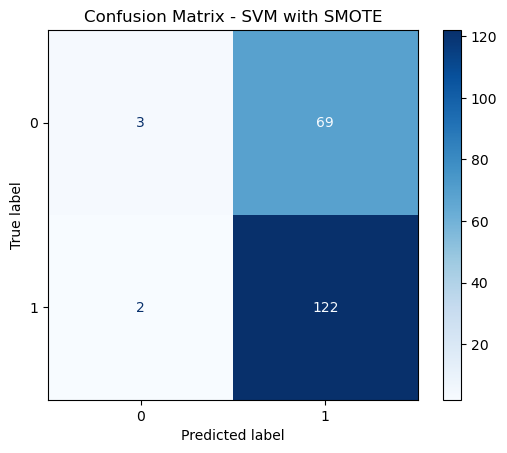

In [113]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_model.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - SVM with SMOTE')
plt.show()


### Interpretation:
Still extremely poor recall for Edible (0) - it correctly predicted only 3 out of 72 edible mushrooms.

Excellent recall (98%) for Poisonous (1).

Precision for Edible is high (60%) but meaningless because it only made 5 edible predictions in total (3 correct, 2 wrong).

The Poly kernel isn’t really improving the edible classification problem.

Same issue as before:
Even after balancing with SMOTE and trying a complex kernel (poly degree 4), SVM still struggles to generalize to edible mushrooms on unseen (test) data.


This confirms that SVM (RBF, Poly, Linear) isn't well-suited to your dataset.

-> The categorical-heavy feature set and the underlying data distribution isn’t working well with SVM’s decision boundary-based method.

Random Forest or a tree-based model will likely handle this much better.

## Task 7: Comparison and Analysis

### Model Performance Comparison

| Model                     | Accuracy | Edible (0) Recall | Poisonous (1) Recall | Notes                                                     |
| :------------------------:| :-------:| :----------------:| :-------------------:| :--------------------------------------------------------:|
| Linear SVM                | 0.47     | 0.47              | 0.48                 | Weak overall performance; struggled with class separation |
| RBF SVM                   | 0.63     | 0.00              | 1.00                 | Excellent recall for poisonous, failed on edible class    |
| Polynomial SVM (degree 4) | 0.62     | 0.22              | 0.85                 | Better class balance, but still weak on edible class      |
| RBF SVM after SMOTE       | 0.64     | 0.04              | 0.98                 | Slightly improved accuracy; edible recall still very low  |



### Strengths and Weaknesses of SVM for the Mushroom Dataset

**Strengths:**

* SVM, particularly with the RBF kernel, was highly effective in classifying poisonous mushrooms.
* After applying SMOTE, the model maintained high recall for the poisonous class while marginally improving overall accuracy.

**Weaknesses:**

* All SVM models struggled to classify edible mushrooms, especially the RBF kernel which had zero recall for edible cases in the imbalanced test data.
* The dataset’s high number of categorical features and inherent class imbalance reduced the effectiveness of SVM.
* Even after resampling with SMOTE, SVM could not effectively learn edible class patterns, indicating that decision boundary-based models like SVM may not be the most suitable choice for this kind of dataset.



### Practical Implications of Using SVM in Real-World Classification Tasks

SVM is a powerful classifier for well-separated, balanced datasets with numerical features. It tends to perform particularly well when classes are distinctly divided in feature space, and when the dataset size is moderate.

However, in imbalanced, small-sized, or categorical-heavy datasets, as in the case of this mushroom dataset, SVM can struggle to generalize. The decision boundaries formed by SVM may fail to accurately separate classes if their patterns are not distinct or if class imbalance is severe.

While techniques like SMOTE can help alleviate class imbalance issues, they may still fall short if the underlying data distributions are not suitable for SVM’s decision boundary-based learning. In such situations, tree-based models such as Random Forest or Gradient Boosting are typically more effective due to their ability to handle categorical data natively and better manage class imbalance.
